In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pred 1: Total Cases till 31st July

In [2]:
df=pd.read_csv('/Users/shivam_goyal/Downloads/ML Assignment/cases.csv')


In [3]:
df['Date_numbers']=np.arange(len(df))
df.head()

,cases_time_series/dailyconfirmed,cases_time_series/dailydeceased,cases_time_series/dailyrecovered,cases_time_series/date,cases_time_series/totalconfirmed,cases_time_series/totaldeceased,cases_time_series/totalrecovered,statewise/active,statewise/confirmed,statewise/deaths,...,tested/source,tested/testpositivityrate,tested/testsconductedbyprivatelabs,tested/testsperconfirmedcase,tested/testspermillion,tested/totalindividualstested,tested/totalpositivecases,tested/totalsamplestested,tested/updatetimestamp,Date_numbers
0,1,0,0,30 January,1,0,0,93517.0,190791.0,5408.0,...,Press_Release_ICMR_13March2020.pdf,1.20%,NaN,83.33,5.0,5900.0,78,6500.0,13/03/2020 00:00:00,0
1,0,0,0,31 January,1,0,0,36040.0,67655.0,2286.0,...,ICMR_website_update_18March_6PM_IST.pdf,1.14%,NaN,87.50,10.0,12235.0,150,13125.0,18/03/2020 18:00:00,1
2,0,0,0,01 February,1,0,0,9400.0,22333.0,176.0,...,ICMR_website_update_19March_10AM_IST_V2.pdf,1.26%,NaN,79.26,10.0,12426.0,168,13316.0,19/03/2020 10:00:00,2
3,1,0,0,02 February,2,0,0,10893.0,19844.0,473.0,...,ICMR_website_update_19March_6PM_IST.pdf,1.28%,NaN,77.88,11.0,13285.0,182,14175.0,19/03/2020 18:00:00,3
4,1,0,0,03 February,3,0,0,5837.0,16794.0,1038.0,...,ICMR_website_update_20March_10AM_IST.pdf,1.43%,NaN,69.79,11.0,13486.0,206,14376.0,20/03/2020 10:00:00,4


In [4]:
df=df.values

In [5]:
y_train=df[:,4]
x_train=df[:,-1]
u=x_train.mean()
std=x_train.std()
print(u,std)
x_train=(x_train-u)/std


61.0 35.505868059613285


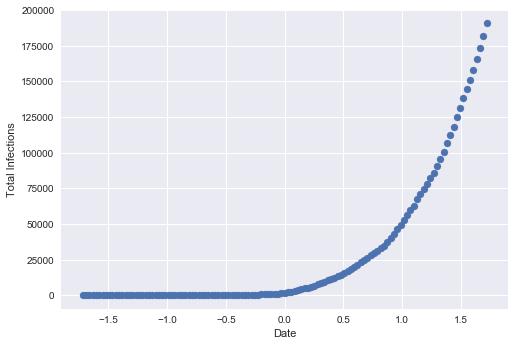

In [6]:
plt.style.use('seaborn')
plt.xlabel('Date')
plt.ylabel('Total Infections')
plt.scatter(x_train,y_train)
plt.show()

In [7]:
x_orig=x_train
y_orig=y_train
print(x_train.shape,y_train.shape)

(123,) (123,)


In [8]:
# LOCALLY WEIGHTED REGRESSION
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        xi=X[i].astype(float)
        x=query_point
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [9]:
x_=(183-u)/std
print(x_)

3.436051747704511


In [10]:
x_train=x_train.reshape((123,-1))
y_train=y_train.reshape((123,-1))
x_train=np.mat(x_train,dtype=float)
y_train=np.mat(y_train,dtype=float)
print(x_train.shape)

(123, 1)


In [11]:
M=x_train.shape[0]
print(M)

123


In [12]:
W=getW(x_,x_train,0.5)
print(W.shape)
print(W)

(123, 123)
[[8.44023350e-24 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.50603984e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67880113e-23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.84243276e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.24654757e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.73062214e-03]]


In [13]:
def predict(X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    print('X',X_.shape)
    qx=np.mat([query_x,1])
    print('qx',qx.shape)
    print('Y',Y.shape)
    W=getW(qx,X_,tau)
    print('W',W.shape)
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    print(theta.shape)
    pred=np.dot(qx,theta)
    return theta,pred

In [14]:
theta,pred_july=predict(x_train,y_train,x_,0.5)

X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)


In [15]:
print(pred_july)

[[586109.75123282]]


#### The total number of cases till 31st july should be approx 586110

In [16]:
# 137-> jan to june
# 183-> jan to july
time_period=[]
pred_values_infections=[]
for i in range(137,183):
    e=(i-u)/std
    time_period.append(e)
    theta,pred=predict(x_train,y_train,time_period[i-137],0.5)
    pred_values_infections.append(pred)

X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
q

In [17]:
b=np.array(pred_values_infections)
b=b.flatten()
b

array([254317.12899852, 260553.90705421, 266851.13354357, 273207.50056603,
       279621.7033718 , 286092.44223478, 292618.42421826, 299198.36483443,
       305830.98959867, 312515.03548041, 319249.25225258, 326032.40374194,
       332863.26898264, 339740.64327611, 346663.33915993, 353630.18728874,
       360640.03723059, 367691.75818149, 374784.23960188, 381916.39177787,
       389087.14631089, 396295.45653873, 403540.29789131, 410820.66818435,
       418135.58785417, 425484.10013655, 432865.27119269, 440278.19018552,
       447721.96930868, 455195.74377158, 462698.67174279, 470229.93425487,
       477788.73507251, 485374.30052747, 492985.87932166, 500622.74230155,
       508284.1822056 , 515969.51338688, 523678.0715137 , 531409.2132491 ,
       539162.31591183, 546936.77712082, 554732.01442415, 562547.46491487,
       570382.58483524, 578236.84917024])

In [18]:
print(type(b))
print(b.shape[0])

<class 'numpy.ndarray'>
46


### Pred 2: Number of deaths till 31st july

In [19]:
df2=pd.read_csv('/Users/shivam_goyal/Downloads/ML Assignment/cases.csv')

In [20]:
df2['Date_numbers']=np.arange(len(df))
df2.head()

,cases_time_series/dailyconfirmed,cases_time_series/dailydeceased,cases_time_series/dailyrecovered,cases_time_series/date,cases_time_series/totalconfirmed,cases_time_series/totaldeceased,cases_time_series/totalrecovered,statewise/active,statewise/confirmed,statewise/deaths,...,tested/source,tested/testpositivityrate,tested/testsconductedbyprivatelabs,tested/testsperconfirmedcase,tested/testspermillion,tested/totalindividualstested,tested/totalpositivecases,tested/totalsamplestested,tested/updatetimestamp,Date_numbers
0,1,0,0,30 January,1,0,0,93517.0,190791.0,5408.0,...,Press_Release_ICMR_13March2020.pdf,1.20%,NaN,83.33,5.0,5900.0,78,6500.0,13/03/2020 00:00:00,0
1,0,0,0,31 January,1,0,0,36040.0,67655.0,2286.0,...,ICMR_website_update_18March_6PM_IST.pdf,1.14%,NaN,87.50,10.0,12235.0,150,13125.0,18/03/2020 18:00:00,1
2,0,0,0,01 February,1,0,0,9400.0,22333.0,176.0,...,ICMR_website_update_19March_10AM_IST_V2.pdf,1.26%,NaN,79.26,10.0,12426.0,168,13316.0,19/03/2020 10:00:00,2
3,1,0,0,02 February,2,0,0,10893.0,19844.0,473.0,...,ICMR_website_update_19March_6PM_IST.pdf,1.28%,NaN,77.88,11.0,13285.0,182,14175.0,19/03/2020 18:00:00,3
4,1,0,0,03 February,3,0,0,5837.0,16794.0,1038.0,...,ICMR_website_update_20March_10AM_IST.pdf,1.43%,NaN,69.79,11.0,13486.0,206,14376.0,20/03/2020 10:00:00,4


In [21]:
df=df2.values
y_train=df[:,5]
x_train=df[:,-1]
u=x_train.mean()
std=x_train.std()
print(u,std)
x_train=(x_train-u)/std


61.0 35.505868059613285


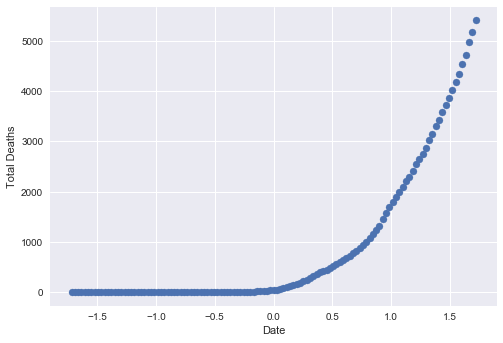

In [22]:
plt.style.use('seaborn')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.scatter(x_train,y_train)
plt.show()

In [23]:
x_train=x_train.reshape((123,-1))
y_train=y_train.reshape((123,-1))
x_train=np.mat(x_train,dtype=float)
y_train=np.mat(y_train,dtype=float)
print(x_train.shape)

(123, 1)


In [24]:
W=getW(x_,x_train,0.5)
print(W.shape)
print(W)

(123, 123)
[[8.44023350e-24 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.50603984e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67880113e-23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.84243276e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.24654757e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.73062214e-03]]


In [25]:
theta,pred=predict(x_train,y_train,x_,0.5)

X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)


In [26]:
print(pred)

[[15522.38508576]]


#### The total number of deaths till 31st july should be approx 15522

### Pred 3: Recovery and Death Rate from 15th June - 31st July 

In [27]:
df3=pd.read_csv('/Users/shivam_goyal/Downloads/ML Assignment/cases.csv')
df3['Date_numbers']=np.arange(len(df))
df3.head()

,cases_time_series/dailyconfirmed,cases_time_series/dailydeceased,cases_time_series/dailyrecovered,cases_time_series/date,cases_time_series/totalconfirmed,cases_time_series/totaldeceased,cases_time_series/totalrecovered,statewise/active,statewise/confirmed,statewise/deaths,...,tested/source,tested/testpositivityrate,tested/testsconductedbyprivatelabs,tested/testsperconfirmedcase,tested/testspermillion,tested/totalindividualstested,tested/totalpositivecases,tested/totalsamplestested,tested/updatetimestamp,Date_numbers
0,1,0,0,30 January,1,0,0,93517.0,190791.0,5408.0,...,Press_Release_ICMR_13March2020.pdf,1.20%,NaN,83.33,5.0,5900.0,78,6500.0,13/03/2020 00:00:00,0
1,0,0,0,31 January,1,0,0,36040.0,67655.0,2286.0,...,ICMR_website_update_18March_6PM_IST.pdf,1.14%,NaN,87.50,10.0,12235.0,150,13125.0,18/03/2020 18:00:00,1
2,0,0,0,01 February,1,0,0,9400.0,22333.0,176.0,...,ICMR_website_update_19March_10AM_IST_V2.pdf,1.26%,NaN,79.26,10.0,12426.0,168,13316.0,19/03/2020 10:00:00,2
3,1,0,0,02 February,2,0,0,10893.0,19844.0,473.0,...,ICMR_website_update_19March_6PM_IST.pdf,1.28%,NaN,77.88,11.0,13285.0,182,14175.0,19/03/2020 18:00:00,3
4,1,0,0,03 February,3,0,0,5837.0,16794.0,1038.0,...,ICMR_website_update_20March_10AM_IST.pdf,1.43%,NaN,69.79,11.0,13486.0,206,14376.0,20/03/2020 10:00:00,4


In [28]:
df=df3.values
y_train_recover=df[:,6]
y_train_death=df[:,5]
x_train=df[:,-1]
u=x_train.mean()
std=x_train.std()
print(u,std)
x_train=(x_train-u)/std

61.0 35.505868059613285


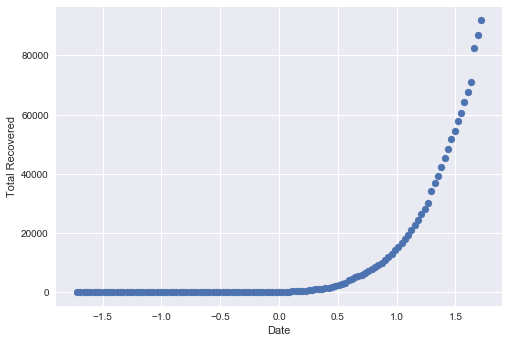

In [29]:
plt.style.use('seaborn')
plt.xlabel('Date')
plt.ylabel('Total Recovered')
plt.scatter(x_train,y_train_recover)
plt.show()

In [30]:
x_train=x_train.reshape((123,-1))
y_train_recover=y_train_recover.reshape((123,-1))
y_train_death=y_train_death.reshape((123,-1))
x_train=np.mat(x_train,dtype=float)
y_train_recover=np.mat(y_train_recover,dtype=float)
print(x_train.shape)


(123, 1)


In [31]:
# 137-> jan to june
# 183-> jan to july
time_period=[]
pred_values_recover=[]
pred_values_death=[]
for i in range(137,183):
    e=(i-u)/std
    time_period.append(e)
    theta,pred_recover=predict(x_train,y_train_recover,time_period[i-137],0.5)
    pred_values_recover.append(pred_recover)
    theta,pred_death=predict(x_train,y_train_death,time_period[i-137],0.5)
    pred_values_death.append(pred_death)
    

X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
qx (1, 2)
Y (123, 1)
W (123, 123)
(2, 1)
X (123, 2)
q

In [32]:
r=np.array(pred_values_recover)
r=r.flatten()
r

array([121431.42085998, 124953.74320456, 128523.65706024, 132140.57242255,
       135803.89997682, 139513.05241399, 143267.44564026, 147066.49988131,
       150909.64068168, 154796.29980131, 158725.91601152, 162697.93579332,
       166711.81394139, 170767.01407741, 174863.00907697, 178999.28141419,
       183175.32342871, 187390.63751962, 191644.73627117, 195937.14251502,
       200267.38933388, 204635.0200112 , 209039.58793174, 213480.65643763,
       217957.79864425, 222470.59722043, 227018.64413712, 231601.54038844,
       236218.89568899, 240870.32815111, 245555.46394529, 250273.93694726,
       255025.38837433, 259809.46641435, 264625.82584918, 269474.12767586,
       274354.03872684, 279265.23129186, 284207.38274331, 289180.17516614,
       294183.29499439, 299216.43265539, 304279.28222278, 309371.54107932,
       314492.90959058, 319643.09078983])

In [33]:
d=np.array(pred_values_death)
d=d.flatten()
d

array([7116.750246443891, 7275.192917006905, 7434.923876036697,
       7595.92583763583, 7758.181944310223, 7921.675747744195,
       8086.3911890059135, 8252.312578449417, 8419.42457554683,
       8587.712168855267, 8757.160656306329, 8927.755625971411,
       9099.482937433855, 9272.328703883179, 9446.27927501166,
       9621.321220788175, 9797.44131615677, 9974.626526688184,
       10152.863995213931, 10332.141029434912, 10512.445090509473,
       10693.763782596892, 10876.084843335924, 11059.396135224362,
       11243.685637863542, 11428.941441025274, 11615.151738494367,
       11802.30482264301, 11990.389079683075, 12179.392985547987,
       12369.305102355676, 12560.114075404308, 12751.808630641088,
       12944.37757258086, 13137.809782597324, 13332.094217576294,
       13527.219908867723, 13723.175961499972, 13919.951553641647,
       14117.535936246604, 14315.918432872688, 14515.088439645551,
       14715.03542532698, 14915.748931479578, 15117.218572709167,
       15319.434036

#### recovery rate from 15th June to 31st July

In [34]:
for i in range(b.shape[0]):
    rr=(r*100/b)
print(rr)
print(rr.shape)
print(type(rr))

[47.74803071 47.95696392 48.16305457 48.36637799 48.56700976 48.7650255
 48.9605007  49.15351057 49.34412987 49.53243276 49.71849265 49.90238207
 50.08417253 50.2639344  50.44173679 50.61764743 50.79173262 50.96405708
 51.13468391 51.3036745  51.47108848 51.63698363 51.80141587 51.96443922
 52.12610574 52.2864655  52.44556661 52.60345517 52.76017526 52.91576897
 53.07027639 53.22373561 53.37618275 53.52765199 53.67817557 53.82778386
 53.97650534 54.12436666 54.27139271 54.41760661 54.56302978 54.70768198
 54.85158136 54.99474451 55.1371865  55.27892096]
(46,)
<class 'numpy.ndarray'>


In [35]:
print(b.shape)
print(rr.shape)

(46,)
(46,)


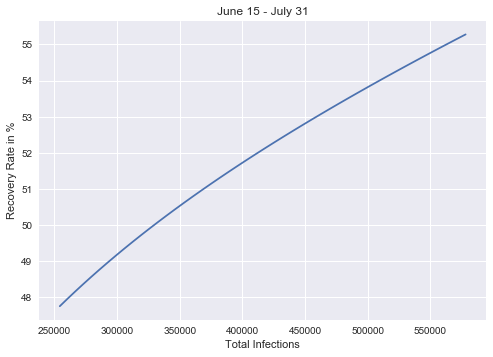

In [36]:
plt.xlabel('Total Infections')
plt.ylabel('Recovery Rate in %')
plt.title('June 15 - July 31')
plt.plot(b,rr)
plt.show()

#### death rate from 15th June to 31st July

In [37]:
for i in range(b.shape[0]):
    dr=(d*100/b)
print(dr)
print(dr.shape)
print(type(dr))

[2.7983762928077476 2.792202580747841 2.7861691188292 2.7802771965991036
 2.77452781767606 2.7689217114108313 2.7634593449161153 2.7581409353677255
 2.7529664624881036 2.7479356811277826 2.743048133869345
 2.7383031635830286 2.7336999258720995 2.7292374013512903
 2.7249144077083223 2.7207296115058264 2.7166815396850814
 2.712768590740256 2.7089890455369567 2.705341077751993 2.701822763918723
 2.698432093064329 2.695166975929975 2.692025253768794 2.6890047067184373
 2.686103061749549 2.683318000192246 2.6806471648459076 2.678088166680139
 2.6756385911331395 2.673296004020417 2.6710579570624633
 2.6689219930448864 2.6668856506233913 2.664946468786242
 2.6631019909890137 2.6613497689755135 2.659687366297948
 2.6581123615517814 2.6566223513383123 2.655214952970446
 2.6538878069336898 2.652638579116815 2.6514649628252682
 2.6503646805899352 2.649335485783166]
(46,)
<class 'numpy.ndarray'>


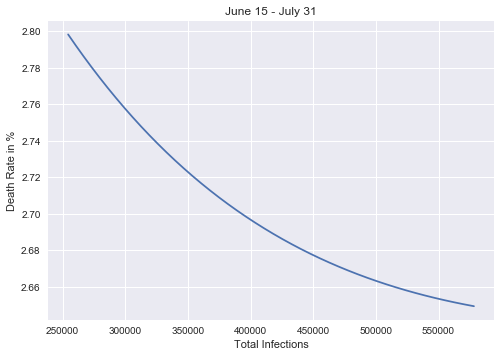

In [38]:
plt.xlabel('Total Infections')
plt.ylabel('Death Rate in %')
plt.title('June 15 - July 31')
plt.plot(b,dr)
plt.show()